In [121]:
#pip install git+https://github.com/syngokhan/NLP_Preprocess.git

In [122]:
import tensorflow as tf

import pandas as pd
import numpy as np
import seaborn as sns
import spacy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix

import Preprocess_gokhanEr as pp

In [123]:
print(tf.__version__)

2.7.0


# Data Preprocessing

In [124]:
path = "/content/imdb_reviews.txt"

df = pd.read_csv(path, sep = "\t", header = None)
df.columns = ["Reviews","Sentiment"]
df.head()

,Reviews,Sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [125]:
def get_clean(words):

    words = pp.get_lower_convert(words)
    words = pp.cont_exp(words)
    words = pp.remove_emails(words)
    words = pp.remove_html_tags(words)
    words = pp.remove_urls(words)
    words = pp.remove_accented_chars(words)
    words = pp.remove_special_chars(words)
    #words = " ".join(pp.spelling_correction(words).words)
    #words = pp.get_make_base(words)
    
    return words

In [126]:
x = "some txt dData"
get_clean(x)

'some txt ddata'

In [127]:
df["Reviews"] = df["Reviews"].apply(lambda words : get_clean(words))
df.head()

,Reviews,Sentiment
0,a very very very slowmoving aimless movie abou...,0
1,not sure who was more lost the flat characters...,0
2,attempting artiness with black white and cleve...,0
3,very little music or anything to speak of,0
4,the best scene in the movie was when gerardo i...,1


# Get The Word2Vec

In [128]:
import spacy
#!python -m spacy download en_core_web_lg

In [129]:
import en_core_web_lg
nlp = en_core_web_lg.load()

In [130]:
def get_vec(words):

    doc = nlp(words)
    vec = doc.vector

    return vec

In [131]:
x = "hi hello"
get_vec(x).shape

(300,)

In [132]:
df["Vec"] = df["Reviews"].apply(lambda words : get_vec(words))
df.head()

,Reviews,Sentiment,Vec
0,a very very very slowmoving aimless movie abou...,0,"[-0.065427616, 0.105150685, -0.23944347, 0.127..."
1,not sure who was more lost the flat characters...,0,"[0.07790671, 0.1754548, -0.14305861, -0.021857..."
2,attempting artiness with black white and cleve...,0,"[-0.1621301, 0.004197893, -0.11855656, -0.1021..."
3,very little music or anything to speak of,0,"[-0.09093174, 0.25162372, -0.25681874, 0.15846..."
4,the best scene in the movie was when gerardo i...,1,"[0.08769195, 0.12695198, -0.097915664, -0.0435..."


In [133]:
X = []

for vec in df["Vec"].values:

    X.append(vec)

X = np.array(X)
y = df["Sentiment"]
X.shape,y.shape

((748, 300), (748,))

# Feature Standardization

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
X.min(),X.max()

(-2.7673, 3.0224)

In [136]:
X_train ,X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y, test_size = 0.2)

scaler = MinMaxScaler(feature_range = (0,1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0000001, 0.0, 1.276688, -0.2493661)

# Model Building And Training

In [137]:
import tensorflow as tf

from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [138]:
X.shape

(748, 300)

In [139]:
model = Sequential()

model.add(Dense(units = 128, activation = "relu", input_dim = X.shape[1]))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))

model.compile(optimizer = Adam(lr = 0.00005), loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train, np.array(y_train), epochs = 20 ,batch_size = 20, validation_data = [X_test,y_test])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
30/30 [==============================] - 1s 9ms/step - loss: 0.6880 - accuracy: 0.5334 - val_loss: 0.6881 - val_accuracy: 0.5667
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6775 - accuracy: 0.6455 - val_loss: 0.6841 - val_accuracy: 0.6267
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6890 - val_loss: 0.6795 - val_accuracy: 0.6467
Epoch 4/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6649 - accuracy: 0.6605 - val_loss: 0.6738 - val_accuracy: 0.6533
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.6421 - val_loss: 0.6700 - val_accuracy: 0.6600
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.6456 - accuracy: 0.7258 - val_loss: 0.6650 - val_accuracy: 0.6600
Epoch 7/20
30/30 [==============================] - 0s 4ms/step - loss: 0.6399 - accuracy: 0.6706 - val_loss: 0.6647 - val_accuracy: 0.5733
Epoch 8/20
30/30 [==

In [140]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               38528     
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 71,681
Trainable params: 71,681
Non-trainable params: 0
_________________________________________________________________


In [141]:
def history_graph(history):

    size = 15
    length = len(history.history["accuracy"])

    plt.figure(figsize = (15,7))

    plt.subplot(1,2,1)
    
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")


    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))
    
    plt.subplot(1,2,2)

    plt.plot(history.history["loss"],label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")

    plt.legend(loc = "best")
    plt.xlabel("Epochs",size = size)
    plt.ylabel("Accuracy Score" , size = size)
    plt.xticks(range(0,length+1))

    plt.suptitle("History Graph", size = size )
    plt.show()

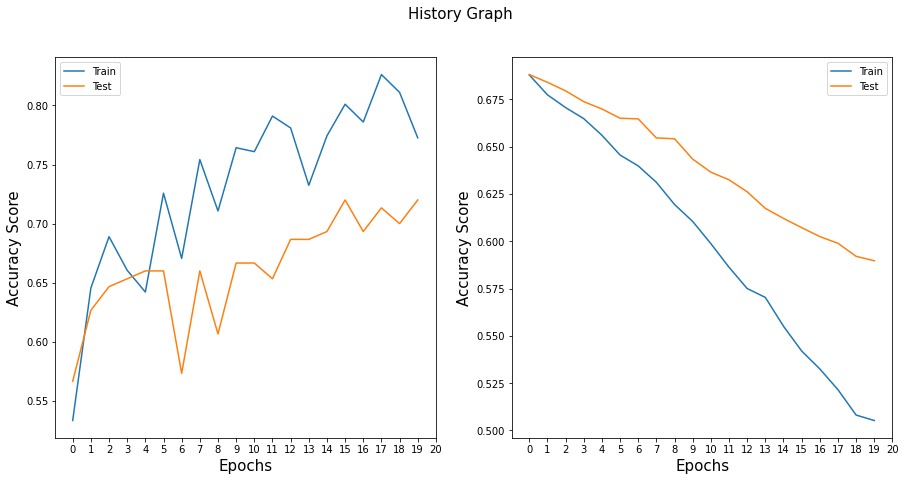

In [142]:
history_graph(history)

In [143]:
def confusion_graph(y_true,y_pred):

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,7))
    sns.heatmap(cm , annot = True , cmap = "viridis",cbar = False, annot_kws={"size" : 15}, fmt = "d", linecolor="white",linewidths=0.5)
    
    size = 15
    plt.xlabel("Predicted",size = size)
    plt.ylabel("Actual", size = size)
    plt.title("Confusion Graph" , size = size)
    plt.show()
    

In [144]:
y_pred = [1 if i > 0.5 else 0 for i in model.predict(X_test)]
y_pred[:5]

[1, 0, 0, 0, 1]

In [145]:
confusion_matrix(y_test,y_pred)

array([[58, 15],
       [27, 50]])

In [146]:
from sklearn.metrics import precision_score,recall_score

y_pred = model.predict(X_test)

for i in [0.30, 0.35, 0.40, 0.45, 0.50 , 0.55, 0.60, 0.65, 0.70, 0.75]:

    classes = [1 if val > i else 0 for val in y_pred]
    precision = round(precision_score(y_test,classes), 4)
    recall = round(recall_score(y_test,classes), 4)
    diff = round(np.abs(precision - recall), 4)

    print(f"Threshold : {i : {10}}, Precision Score : {precision:{10}}, Recall Score : {recall:{10}}, Diff : {diff}")

Threshold :        0.3, Precision Score :       0.56, Recall Score :     0.9091, Diff : 0.3491
Threshold :       0.35, Precision Score :     0.5929, Recall Score :     0.8701, Diff : 0.2772
Threshold :        0.4, Precision Score :     0.6566, Recall Score :     0.8442, Diff : 0.1876
Threshold :       0.45, Precision Score :     0.7209, Recall Score :     0.8052, Diff : 0.0843
Threshold :        0.5, Precision Score :     0.7692, Recall Score :     0.6494, Diff : 0.1198
Threshold :       0.55, Precision Score :     0.7959, Recall Score :     0.5065, Diff : 0.2894
Threshold :        0.6, Precision Score :     0.7879, Recall Score :     0.3377, Diff : 0.4502
Threshold :       0.65, Precision Score :     0.8947, Recall Score :     0.2208, Diff : 0.6739
Threshold :        0.7, Precision Score :     0.8667, Recall Score :     0.1688, Diff : 0.6979
Threshold :       0.75, Precision Score :        0.9, Recall Score :     0.1169, Diff : 0.7831


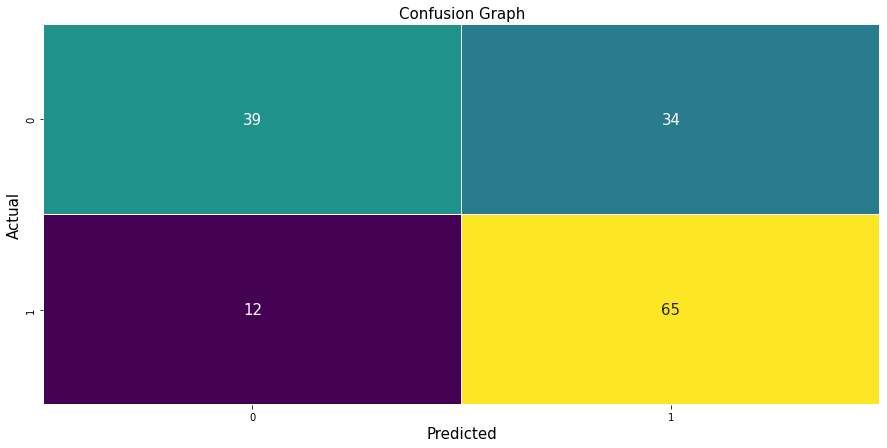

In [147]:
new_y_pred = [1 if val > .4 else 0 for val in y_pred]

confusion_graph(y_test ,new_y_pred)

# 1D CNN Model Building And Tuning

In [148]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D,BatchNormalization,Dropout

In [149]:
CDD_X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1], 1)
CDD_X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1], 1)

In [150]:
CDD_X_train.shape , CDD_X_test.shape

((598, 300, 1), (150, 300, 1))

In [151]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters = 32 , kernel_size = 2, activation = "relu", input_shape = CDD_X_train[0].shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(rate = 0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 64, activation = "relu"))
cnn_model.add(Dropout(rate = 0.3))

cnn_model.add(Dense(units = 1, activation = "sigmoid"))

cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 299, 32)           96        
                                                                 
 batch_normalization_1 (Batc  (None, 299, 32)          128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 299, 32)           0         
                                                                 
 flatten_1 (Flatten)         (None, 9568)              0         
                                                                 
 dense_14 (Dense)            (None, 64)                612416    
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                      

In [152]:
epochs = 20

cnn_model.compile(optimizer = Adam(lr = 0.00001), loss = "binary_crossentropy", metrics = ["accuracy"])

cnn_history = cnn_model.fit(CDD_X_train, np.array(y_train), epochs = epochs, validation_data = [CDD_X_test, np.array(y_test)])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


19/19 [==============================] - 1s 33ms/step - loss: 0.7176 - accuracy: 0.5535 - val_loss: 0.6913 - val_accuracy: 0.4867
Epoch 2/20
19/19 [==============================] - 0s 25ms/step - loss: 0.6389 - accuracy: 0.6455 - val_loss: 0.6894 - val_accuracy: 0.5333
Epoch 3/20
19/19 [==============================] - 0s 23ms/step - loss: 0.6009 - accuracy: 0.6856 - val_loss: 0.6873 - val_accuracy: 0.6400
Epoch 4/20
19/19 [==============================] - 0s 23ms/step - loss: 0.5961 - accuracy: 0.6789 - val_loss: 0.6850 - val_accuracy: 0.6733
Epoch 5/20
19/19 [==============================] - 0s 22ms/step - loss: 0.5614 - accuracy: 0.7241 - val_loss: 0.6818 - val_accuracy: 0.7333
Epoch 6/20
19/19 [==============================] - 0s 25ms/step - loss: 0.5383 - accuracy: 0.7375 - val_loss: 0.6786 - val_accuracy: 0.7400
Epoch 7/20
19/19 [==============================] - 0s 22ms/step - loss: 0.5266 - accuracy: 0.7425 - val_loss: 0.6747 - val_accuracy: 0.7600
Epoch 8/20
19/19 [======

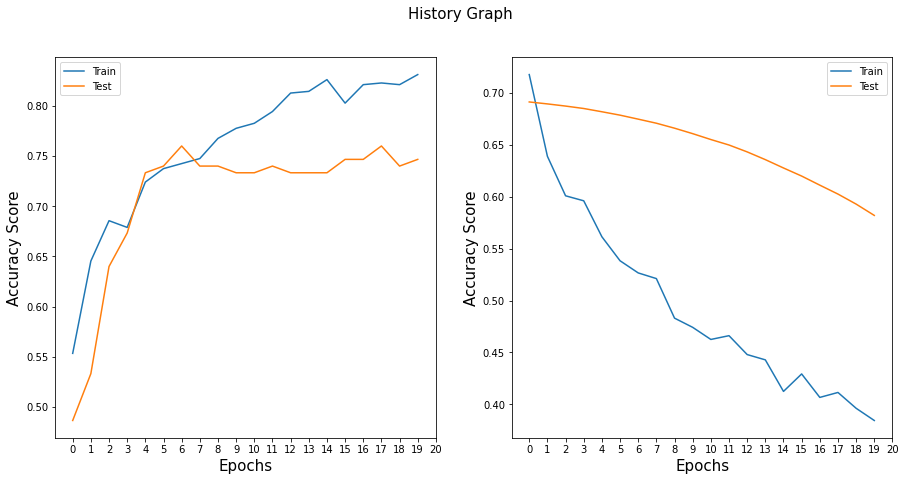

In [153]:
history_graph(cnn_history)

In [154]:
from sklearn.metrics import precision_score,recall_score

y_pred = cnn_model.predict(CDD_X_test)

for i in [0.30, 0.35, 0.40, 0.45, 0.50 , 0.55, 0.60, 0.65, 0.70, 0.75]:

    classes = [1 if val > i else 0 for val in y_pred]
    precision = round(precision_score(y_test,classes), 4)
    recall = round(recall_score(y_test,classes), 4)
    diff = round(np.abs(precision - recall), 4)

    print(f"Threshold : {i : {10}}, Precision Score : {precision:{10}}, Recall Score : {recall:{10}}, Diff : {diff}")

Threshold :        0.3, Precision Score :     0.5352, Recall Score :      0.987, Diff : 0.4518
Threshold :       0.35, Precision Score :     0.5639, Recall Score :      0.974, Diff : 0.4101
Threshold :        0.4, Precision Score :      0.592, Recall Score :      0.961, Diff : 0.369
Threshold :       0.45, Precision Score :     0.6765, Recall Score :     0.8961, Diff : 0.2196
Threshold :        0.5, Precision Score :     0.7349, Recall Score :     0.7922, Diff : 0.0573
Threshold :       0.55, Precision Score :     0.8727, Recall Score :     0.6234, Diff : 0.2493
Threshold :        0.6, Precision Score :     0.9643, Recall Score :     0.3506, Diff : 0.6137
Threshold :       0.65, Precision Score :        1.0, Recall Score :     0.1558, Diff : 0.8442
Threshold :        0.7, Precision Score :        1.0, Recall Score :      0.039, Diff : 0.961
Threshold :       0.75, Precision Score :        1.0, Recall Score :      0.013, Diff : 0.987


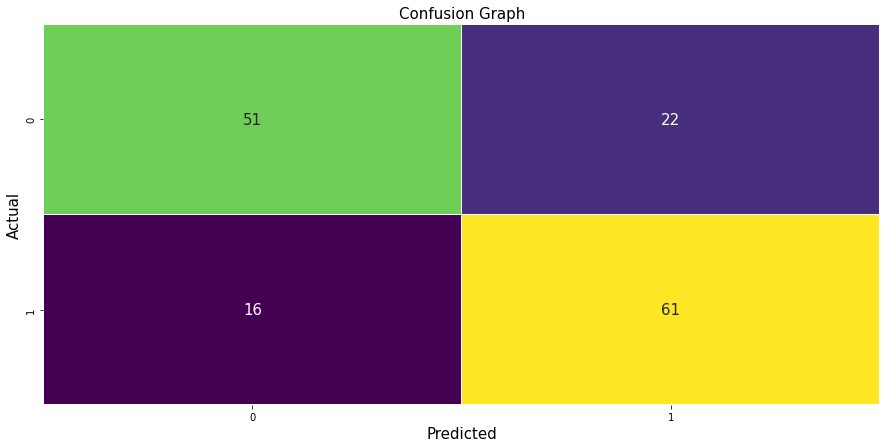

In [155]:
y_pred_cnn = [1 if val > 0.5 else 0 for val in y_pred]

confusion_graph(y_test, y_pred_cnn)

# Model Load , Store and Testing

In [156]:
from tensorflow.keras.models import load_model

In [157]:
cnn_model.save("Cnn_Model", save_format = "h5")

model = load_model("Cnn_Model")

In [158]:
def get_pred(words, model , scaler):

    words = get_clean(words)

    vec = get_vec(words).reshape(1,-1)
    vec = scaler.transform(vec)
    vec = vec.reshape(1,300,1)
    y_pred = model.predict(vec)

    if y_pred > 0.5:

        return 1 

    else:

        return 0

In [159]:
words = "it was a nice movie. Thanks for making it"

get_pred(words, model, scaler )

1